<a href="https://colab.research.google.com/github/rahiakela/machine-learning-research-and-practice/blob/main/hands-on-machine-learning-with-scikit-learn-keras-and-tensorflow/7-ensemble-learning-and-random-forests/03_ensemble_learning_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Ensemble Learning Exercises

If you aggregate
the predictions of a group of predictors (such as classifiers or regressors), you will
often get better predictions than with the best individual predictor. A group of predictors
is called an ensemble; thus, this technique is called Ensemble Learning, and an
Ensemble Learning algorithm is called an Ensemble method.

Boosting (originally called hypothesis boosting) refers to any Ensemble method that can combine several weak learners into a strong learner. The general idea of most boosting methods is to train predictors sequentially, each trying to correct its predecessor.

There are many boosting methods available, but by far the most popular are

* AdaBoost(short for Adaptive Boosting)
* Gradient Boosting

In fact, the winning solutions in Machine Learning competitions
often involve several Ensemble methods (most famously in the Netflix Prize
competition).



##Setup

In [8]:
# Common imports
import numpy as np
import os

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, as_frame=False)
    mnist.target = mnist.target.astype(np.int64)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

##Exercise-1

Let's load the MNIST data, and split it into a training set, a
validation set, and a test set (e.g., use 50,000 instances for training, 10,000 for validation,
and 10,000 for testing). 

Then train various classifiers, such as a Random
Forest classifier, an Extra-Trees classifier, and an SVM classifier. 

Next, try to combine
them into an ensemble that outperforms each individual classifier on the
validation set, using soft or hard voting. Once you have found one, try it on the
test set. 

How much better does it perform compared to the individual classifiers?

###Step-1

_Load the MNIST data and split it into a training set, a validation set, and a test set (e.g., use 50,000 instances for training, 10,000 for validation, and 10,000 for testing)._

In [3]:
x_train_val, x_test, y_train_val, y_test = train_test_split(mnist.data, mnist.target, test_size=10000, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=10000, random_state=42)

###Step-2

_Then train various classifiers, such as a Random Forest classifier, an Extra-Trees classifier, and an SVM._

In [5]:
random_forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=10, random_state=42)
svm_clf = LinearSVC(random_state=42)
mlp_clf = MLPClassifier(random_state=42)

In [6]:
estimators = [random_forest_clf, extra_trees_clf, svm_clf, mlp_clf]

for estimator in estimators:
  print(f"Traing the {estimator}")
  estimator.fit(x_train, y_train)

Traing the RandomForestClassifier(n_estimators=10, random_state=42)
Traing the ExtraTreesClassifier(n_estimators=10, random_state=42)
Traing the LinearSVC(random_state=42)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Traing the MLPClassifier(random_state=42)


In [7]:
[estimator.score(x_val, y_val) for estimator in estimators]

[0.9469, 0.9492, 0.8695, 0.9639]

The linear SVM is far outperformed by the other classifiers. 

However, let's keep it for now since it may improve the voting classifier's performance.

###Step-3

_Next, try to combine them into an ensemble that outperforms them all on the validation set, using a soft or hard voting classifier._

In [9]:
named_estimators = [
  ("random_forest_clf", random_forest_clf),
  ("extra_trees_clf", extra_trees_clf),
  ("svm_clf", svm_clf),
  ("mlp_clf", mlp_clf)                 
]

In [10]:
voting_clf = VotingClassifier(named_estimators)
voting_clf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('extra_trees_clf',
                              ExtraTreesClassifier(n_estimators=10,
                                                   random_state=42)),
                             ('svm_clf', LinearSVC(random_state=42)),
                             ('mlp_clf', MLPClassifier(random_state=42))])

In [11]:
voting_clf.score(x_val, y_val)

0.9624

In [12]:
[estimator.score(x_val, y_val) for estimator in voting_clf.estimators_]

[0.9469, 0.9492, 0.8695, 0.9639]

###Step-4

Let's remove the SVM to see if performance improves. It is possible to remove an estimator by setting it to `None` using `set_params()` like this:

In [13]:
voting_clf.set_params(svm_clf=None)

VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('extra_trees_clf',
                              ExtraTreesClassifier(n_estimators=10,
                                                   random_state=42)),
                             ('svm_clf', None),
                             ('mlp_clf', MLPClassifier(random_state=42))])

This updated the list of estimators:

In [14]:
voting_clf.estimators

[('random_forest_clf',
  RandomForestClassifier(n_estimators=10, random_state=42)),
 ('extra_trees_clf', ExtraTreesClassifier(n_estimators=10, random_state=42)),
 ('svm_clf', None),
 ('mlp_clf', MLPClassifier(random_state=42))]

However, it did not update the list of _trained_ estimators:

In [15]:
voting_clf.estimators_

[RandomForestClassifier(n_estimators=10, random_state=42),
 ExtraTreesClassifier(n_estimators=10, random_state=42),
 LinearSVC(random_state=42),
 MLPClassifier(random_state=42)]

So we can either fit the `VotingClassifier` again, or just remove the SVM from the list of trained estimators:

In [16]:
del voting_clf.estimators_[2]

Now let's evaluate the `VotingClassifier` again:

In [17]:
voting_clf.score(x_val, y_val)

0.9652

A bit better! The SVM was hurting performance. 

###Step-5

Now let's try using a soft voting classifier. 

We do not actually need to retrain the classifier, we can just set `voting` to `"soft"`:

In [18]:
voting_clf.voting = "soft"

voting_clf.score(x_val, y_val)

0.9698

That's a significant improvement, and it's much better than each of the individual classifiers.

###Step-6

_Once you have found one, try it on the test set. How much better does it perform compared to the individual classifiers?_

In [19]:
voting_clf.score(x_test, y_test)

0.9677

In [20]:
[estimator.score(x_test, y_test) for estimator in voting_clf.estimators_]

[0.9437, 0.9474, 0.9604]

The voting classifier reduced the error rate from about 4.0% for our best model (the `MLPClassifier`) to just 3.1%. 

That's about 22.5% less errors, not bad!

##Exercise-2

Let's run the individual classifiers from the previous exercise to make predictions on
the validation set, and create a new training set with the resulting predictions:
each training instance is a vector containing the set of predictions from all your
classifiers for an image, and the target is the image’s class. Train a classifier on
this new training set. 

Congratulations, you have just trained a blender, and
together with the classifiers it forms a stacking ensemble! Now evaluate the
ensemble on the test set. For each image in the test set, make predictions with all
your classifiers, then feed the predictions to the blender to get the ensemble’s predictions.

How does it compare to the voting classifier you trained earlier?

In [ ]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [ ]:
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

Next, we’ll train a second `DecisionTreeRegressor` on the residual errors made by the first predictor:

In [ ]:
y2 = y - tree_reg1.predict(X)

tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2)

Then we train a third regressor on the residual errors made by the second predictor:

In [ ]:
y3 = y2 - tree_reg2.predict(X)

tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2)

Now we have an ensemble containing three trees. It can make predictions on a new instance simply by adding up the predictions of all the trees:

In [ ]:
X_new = np.array([[0.8]])

y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [ ]:
y_pred

array([0.75026781])

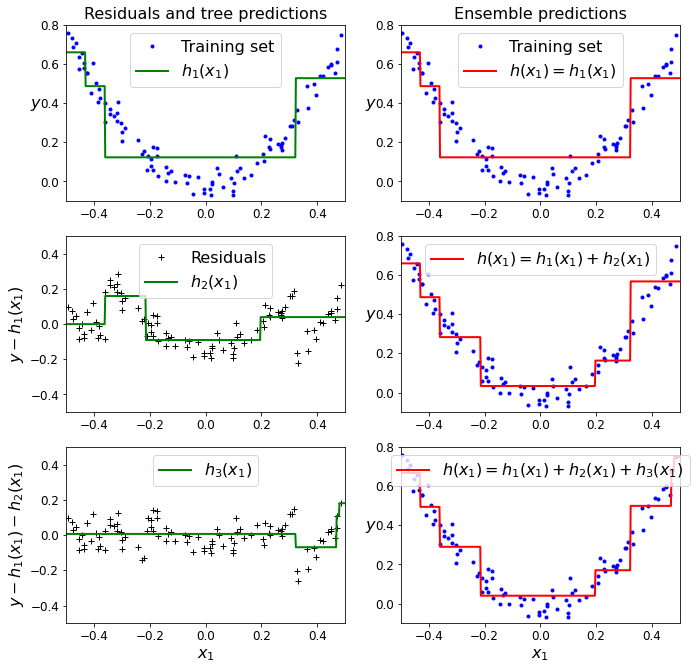

In [ ]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

In the first row, the ensemble has just one
tree, so its predictions are exactly the same as the first tree’s predictions. 

In the second
row, a new tree is trained on the residual errors of the first tree. On the right you can
see that the ensemble’s predictions are equal to the sum of the predictions of the first
two trees. 

Similarly, in the third row another tree is trained on the residual errors of
the second tree. You can see that the ensemble’s predictions gradually get better as
trees are added to the ensemble.


A simpler way to train `GBRT` ensembles is to use Scikit-Learn’s `GradientBoostingRegressor` class. Much like the `RandomForestRegressor` class, it has hyperparameters to control the growth of Decision Trees (e.g., `max_depth, min_samples_leaf`), as well as `hyperparameters` to control the ensemble training, such as the number of trees (`n_estimators`).

In [ ]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

The `learning_rate` hyperparameter scales the contribution of each tree. If you set it to a low value, such as 0.1, you will need more trees in the ensemble to fit the training set, but the predictions will usually generalize better. This is a regularization technique
called shrinkage.

Let's check two GBRT ensembles trained with a low
learning rate: the one on the left does not have enough trees to fit the training set,
while the one on the right has too many trees and overfits the training set.

In [ ]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)

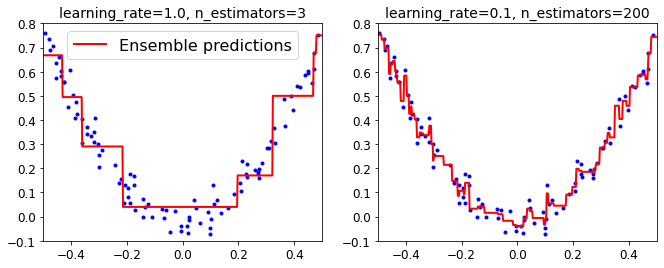

In [ ]:
plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)

plt.show()